In [583]:
# imports
import urllib.request
from random import randint
import enchant
import matplotlib.pyplot as plt

In [584]:
# read in 5 letter words txt file, create word array
url = "https://www-cs-faculty.stanford.edu/~knuth/sgb-words.txt"
file = urllib.request.urlopen(url)
word_array = []
linenum = 0
for line in file:
    linenum = linenum + 1
    decoded_line = line.decode("utf-8")
    word_array.append(decoded_line.strip())
len(word_array)

5757

In [585]:
# ensure that imported words are actually words
dictionary = enchant.Dict("en_US")
for x in word_array:
    tf = dictionary.check(x)
    if tf == False:
        word_array.remove(x)
len(word_array)

5280

In [586]:
# variables, arrays and game stats
fullycorrectletters = ['_','_','_','_','_']
partiallycorrectletters = ['_','_','_','_','_']
incorrectletters = []
guesscount = 6
streak = 0
firstguess = ''
secondguess = ''
thirdguess = ''
fourthguess = ''
fifthguess = ''
sixthguess = ''
previousguesses = []
wordcount = 0
correctwords = 0
accuracy = 0
longeststreak = 0
solvedguessone = 0
solvedguesstwo = 0
solvedguessthree = 0
solvedguessfour = 0
solvedguessfive = 0
solvedguesssix = 0

In [587]:
# word selection function
word = ''
letterlist = ''
def wordselector():
    global word
    global letterlist
    global fullycorrectletters
    global partiallycorrectletters
    global incorrectletters
    randindex = randint(0,len(word_array))
    word = word_array[randindex]
    letterlist = list(word)
    fullycorrectletters = ['_','_','_','_','_']
    partiallycorrectletters = []
    incorrectletters = []
wordselector()

In [588]:
# create guess function
def guess(x):
    global previousguesses
    global word
    global letterlist
    if len(x) == 5 and x.isalpha() == True and dictionary.check(x) == True and x not in previousguesses:
        previousguesses.append(x)
        x1=x[0]
        x2=x[1]
        x3=x[2]
        x4=x[3]
        x5=x[4]
        previousguess = [x1,x2,x3,x4,x5]
        if x1 == letterlist[0]:
            print(x1 + " is correct!")
            fullycorrectletters[0] = x1
            if x1 in partiallycorrectletters:
                partiallycorrectletters.remove(x1)
        elif x1 == letterlist[1] or x1 == letterlist[2] or x1 == letterlist[3] or x1 == letterlist[4]:
            print(x1 + " is in this word, but not in the correct space.")
            if x1 not in partiallycorrectletters:
                partiallycorrectletters.append(x1)
        else:
            print(x1 + " is not in the word.")
            if x1 not in incorrectletters:
                incorrectletters.append(x1)
        if x2 == letterlist[1]:
            print(x2 + " is correct!")
            fullycorrectletters[1] = x2
            if x2 in partiallycorrectletters:
                partiallycorrectletters.remove(x2)
        elif x2 == letterlist[0] or x2 == letterlist[2] or x2 == letterlist[3] or x2 == letterlist[4]:
            print(x2 + " is in this word, but not in the correct space.")
            if x2 not in partiallycorrectletters:
                partiallycorrectletters.append(x2)
        else:
            print(x2 + " is not in the word.")
            if x2 not in incorrectletters:
                incorrectletters.append(x2)
        if x3 == letterlist[2]:
            print(x3 + " is correct!")
            fullycorrectletters[2] = x3
            if x3 in partiallycorrectletters:
                partiallycorrectletters.remove(x3)
        elif x3 == letterlist[0] or x3 == letterlist[1] or x3 == letterlist[3] or x3 == letterlist[4]:
            print(x3 + " is in this word, but not in the correct space.")
            if x3 not in partiallycorrectletters:
                partiallycorrectletters.append(x3)
        else:
            print(x3 + " is not in the word.")
            if x3 not in incorrectletters:
                incorrectletters.append(x3)
        if x4 == letterlist[3]:
            print(x4 + " is correct!")
            fullycorrectletters[3] = x4
            if x4 in partiallycorrectletters:
                partiallycorrectletters.remove(x4)
        elif x4 == letterlist[0] or x4 == letterlist[1] or x4 == letterlist[2] or x4 == letterlist[4]:
            print(x4 + " is in this word, but not in the correct space.")
            if x4 not in partiallycorrectletters:
                partiallycorrectletters.append(x4)
        else:
            print(x4 + " is not in the word.")
            if x4 not in incorrectletters:
                incorrectletters.append(x4)
        if x5 == letterlist[4]:
            print(x5 + " is correct!")
            fullycorrectletters[4] = x5
            if x5 in partiallycorrectletters:
                partiallycorrectletters.remove(x5)
        elif x5 == letterlist[0] or x5 == letterlist[1] or x5 == letterlist[2] or x5 == letterlist[3]:
            print(x5 + " is in this word, but not in the correct space.")
            if x5 not in partiallycorrectletters:
                partiallycorrectletters.append(x5)
        else:
            print(x5 + " is not in the word.")
            if x5 not in incorrectletters:
                incorrectletters.append(x5)
        global guesscount
        if x1 == word[0] and x2 == word[1] and x3 == word[2] and x4 == word[3] and x5 == word[4]:
            if guesscount == 6:
                global solvedguessone
                solvedguessone += 1
            if guesscount == 5:
                global solvedguesstwo
                solvedguesstwo += 1
            if guesscount == 4:
                global solvedguessthree 
                solvedguessthree += 1
            if guesscount == 3:
                global solvedguessfour 
                solvedguessfour += 1
            if guesscount == 2:
                global solvedguessfive 
                solvedguessfive += 1
            if guesscount == 1:
                global solvedguesssix 
                solvedguesssix +=1
            global streak
            streak += 1
            guesscount = 6
            print("You won!")
            previousguesses = []
            global correctwords
            correctwords += 1
            global wordcount
            wordcount += 1
            wordselector()
        else:
            guesscount -= 1
            print("You have " + str(guesscount) + " guesses left.")
        if guesscount == 5:
            global firstguess
            firstguess = x
            print("Your first guess was: '" + firstguess + "'.")
        if guesscount == 4:
            global secondguess
            secondguess = x
            print("Your first guess was: '" + firstguess + "'.")
            print("Your second guess was: '" + secondguess + "'.")
        if guesscount == 3:
            global thirdguess
            thirdguess = x
            print("Your first guess was: '" + firstguess + "'.")
            print("Your second guess was: '" + secondguess + "'.")
            print("Your third guess was: '" + thirdguess + "'.")
        if guesscount == 2:
            global fourthguess
            fourthguess = x
            print("Your first guess was: '" + firstguess + "'.")
            print("Your second guess was: '" + secondguess + "'.")
            print("Your third guess was: '" + thirdguess + "'.")
            print("Your fourth guess was: '" + fourthguess + "'.")
        if guesscount == 1:
            global fifthguess
            fifthguess = x
            print("Your first guess was: '" + firstguess + "'.")
            print("Your second guess was: '" + secondguess + "'.")
            print("Your third guess was: '" + thirdguess + "'.")
            print("Your fourth guess was: '" + fourthguess + "'.")
            print("Your fifth guess was: '" + fifthguess + "'.")
        if guesscount == 0:
            global sixthguess
            sixthguess = x
            print("Your first guess was: '" + firstguess + "'.")
            print("Your second guess was: '" + secondguess + "'.")
            print("Your third guess was: '" + thirdguess + "'.")
            print("Your fourth guess was: '" + fourthguess + "'.")
            print("Your fifth guess was: '" + fifthguess + "'.")
            print("Your sixth guess was: '" + sixthguess + "'.")
            print("The game is over! You ran out of guesses. The word was '" + word + "'. Please try again!")
            guesscount = 6
            streak = 0
            previousguesses = []
            wordcount += 1
            wordselector()
    else:
        print("Please guess a 5 letter English word that you have not guessed yet in this current game.")
    global longeststreak
    if streak >= longeststreak:
        longeststreak = streak
    print("Your previous guess was '" + x + "'.")
    print("")
    print("On to your next try!")
    print("Guessed letters not in the word include: " + str(incorrectletters))
    print("Guessed letters in the word but not in correct spaces include: " + str(partiallycorrectletters))
    print("Guessed letters in correct spaces include: " + str(fullycorrectletters))
    print("Your current streak is " + str(streak) + ".")
    print("Your longest streak is " + str(longeststreak) + ".")
    if wordcount > 1:
        global accuracy
        accuracy = correctwords/wordcount * 100
        accuracy = "{:.2f}".format(accuracy)
        print("Your win rate is " + str(accuracy) + "%.")   
    solvedguesslabels = ['6','5','4','3','2','1']
    solvedguessquantity = [solvedguesssix,solvedguessfive,solvedguessfour,solvedguessthree,solvedguesstwo,solvedguessone]
    plt.barh(solvedguesslabels,solvedguessquantity)
    plt.title('Solved Words Guess Distribution')
    plt.ylabel('Guess #')
    plt.xlabel('Count')
    plt.show()

**If playing, do not rerun cells above after getting to this point. Doing so will lose your past performance data.**

g is correct!
u is not in the word.
e is in this word, but not in the correct space.
s is in this word, but not in the correct space.
s is correct!
You have 5 guesses left.
Your first guess was: 'guess'.
Your previous guess was 'guess'.

On to your next try!
Guessed letters not in the word include: ['u']
Guessed letters in the word but not in correct spaces include: ['e']
Guessed letters in correct spaces include: ['g', '_', '_', '_', 's']
Your current streak is 0.
Your longest streak is 0.


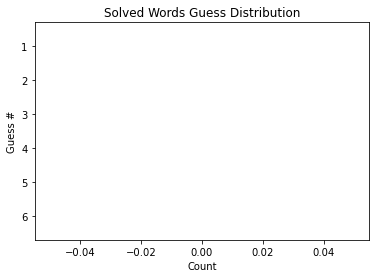

In [582]:
# guess
guess("")